In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
import glob
import corner as corner
import os


/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
result_PL=h5py.File('O1O2O3_powerlawm2min_prod_gammamax35/result/bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')
result_PL_lowermmin=h5py.File('O1O2O3_powerlawm2min_prod_gammamax35_mmin15/result/bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')

result_parabola=h5py.File('O1O2O3_parabolam2min_prod_allgammazeta/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')
result_parabola_cond=h5py.File('O1O2O3_parabolam2min_prod_condgammazeta/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')

In [4]:
PLPP_result_parabola=h5py.File('O1O2O3_PLPP/result/bbh_mass_two_component_primary_mass_ratio_redshift_powerlaw_result.hdf5')


In [5]:
PL_result_dict = {'alpha':result_PL['posterior']['alpha'], 
                         'beta':result_PL['posterior']['beta'], 
                         'gamma':result_PL['posterior']['gamma'],
                         'mmin': result_PL['posterior']['mmin'], 
                         'mmax': result_PL['posterior']['mmax']}
PL_lowmmin_result_dict = {'alpha':result_PL_lowermmin['posterior']['alpha'], 
                         'beta':result_PL_lowermmin['posterior']['beta'], 
                         'gamma':result_PL_lowermmin['posterior']['gamma'],
                         'mmin': result_PL_lowermmin['posterior']['mmin'], 
                         'mmax': result_PL_lowermmin['posterior']['mmax']}
parabola_result_dict = {'alpha':result_parabola['posterior']['alpha'], 
                         'beta':result_parabola['posterior']['beta'], 
                         'gamma':result_parabola['posterior']['gamma'],
                         'zeta':result_parabola['posterior']['zeta'],
                         'mmin': result_parabola['posterior']['mmin'], 
                         'mmax': result_parabola['posterior']['mmax']}
PLPP_result_dict = {'alpha':PLPP_result_parabola['posterior']['alpha'], 
                         'beta':PLPP_result_parabola['posterior']['beta'], 
                         'mmin': PLPP_result_parabola['posterior']['mmin'], 
                         'mmax': PLPP_result_parabola['posterior']['mmax']}
parabolacond_result_dict = {'alpha':result_parabola_cond['posterior']['alpha'], 
                         'beta':result_parabola_cond['posterior']['beta'], 
                         'gamma':result_parabola_cond['posterior']['gamma'],
                         'zeta':result_parabola_cond['posterior']['zeta'],
                         'mmin': result_parabola_cond['posterior']['mmin'], 
                         'mmax': result_parabola_cond['posterior']['mmax']}

In [10]:
PLPP_result_parabola['posterior'].keys()

<KeysViewHDF5 ['alpha', 'beta', 'gaussian_mass_maximum', 'lam', 'lamb', 'ln_bf_0', 'ln_bf_1', 'ln_bf_10', 'ln_bf_11', 'ln_bf_12', 'ln_bf_13', 'ln_bf_14', 'ln_bf_15', 'ln_bf_16', 'ln_bf_17', 'ln_bf_18', 'ln_bf_19', 'ln_bf_2', 'ln_bf_20', 'ln_bf_21', 'ln_bf_22', 'ln_bf_23', 'ln_bf_24', 'ln_bf_25', 'ln_bf_26', 'ln_bf_27', 'ln_bf_28', 'ln_bf_29', 'ln_bf_3', 'ln_bf_30', 'ln_bf_31', 'ln_bf_32', 'ln_bf_33', 'ln_bf_34', 'ln_bf_35', 'ln_bf_36', 'ln_bf_37', 'ln_bf_38', 'ln_bf_39', 'ln_bf_4', 'ln_bf_40', 'ln_bf_41', 'ln_bf_42', 'ln_bf_43', 'ln_bf_44', 'ln_bf_45', 'ln_bf_46', 'ln_bf_47', 'ln_bf_48', 'ln_bf_49', 'ln_bf_5', 'ln_bf_50', 'ln_bf_51', 'ln_bf_52', 'ln_bf_53', 'ln_bf_54', 'ln_bf_55', 'ln_bf_56', 'ln_bf_57', 'ln_bf_58', 'ln_bf_59', 'ln_bf_6', 'ln_bf_60', 'ln_bf_61', 'ln_bf_62', 'ln_bf_63', 'ln_bf_64', 'ln_bf_65', 'ln_bf_66', 'ln_bf_67', 'ln_bf_68', 'ln_bf_69', 'ln_bf_7', 'ln_bf_70', 'ln_bf_71', 'ln_bf_72', 'ln_bf_73', 'ln_bf_74', 'ln_bf_75', 'ln_bf_76', 'ln_bf_77', 'ln_bf_78', 'ln_bf_79', 

In [8]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)
O4acorner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkgreen",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

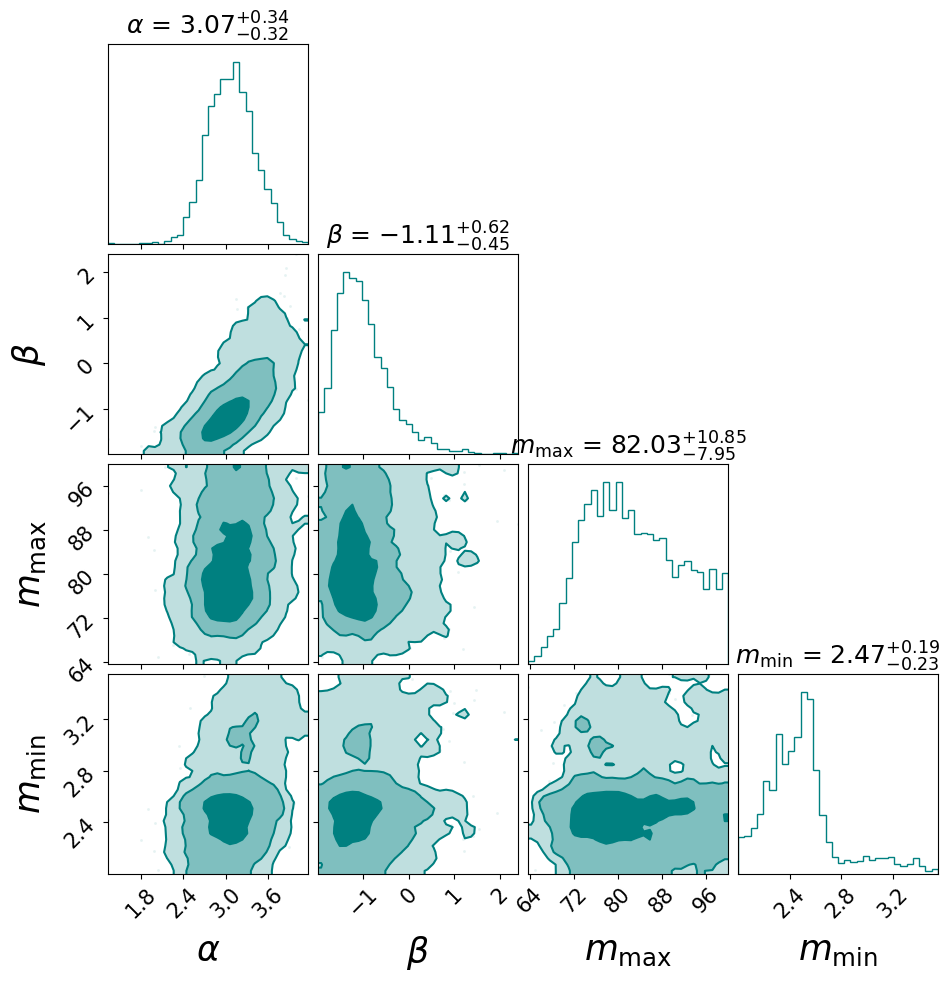

In [9]:
plt.rcParams.update({'font.size': 15})
fig = corner.corner(PLPP_result_dict,  **corner_kwargs)

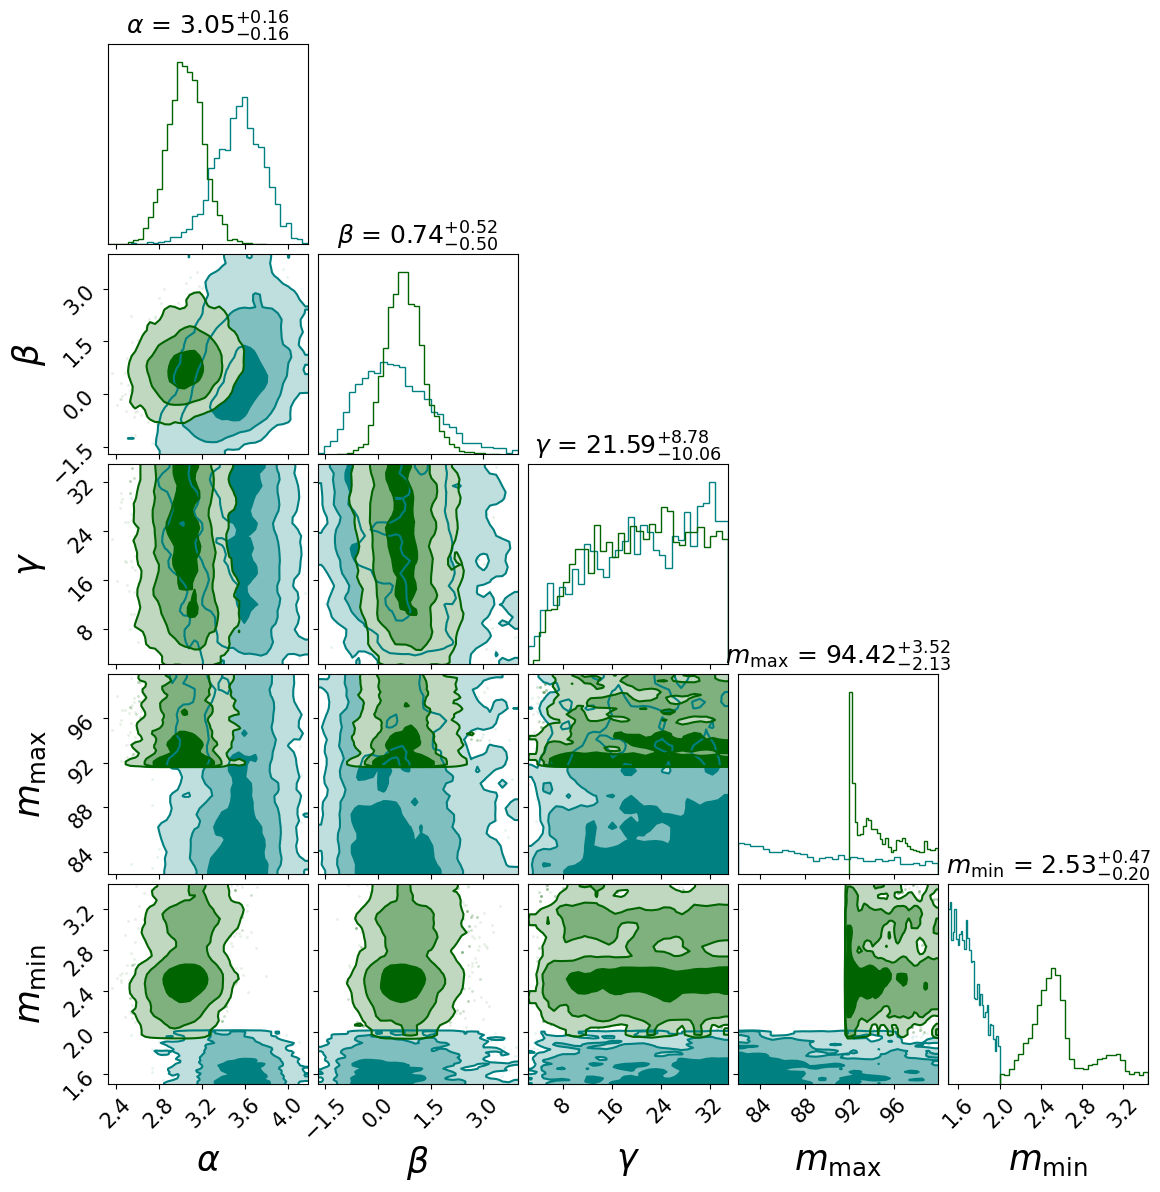

In [10]:
plt.rcParams.update({'font.size': 15})
fig = corner.corner(PL_lowmmin_result_dict,  **corner_kwargs)
corner.corner(O4aPL_result_dict, fig=fig, **O4acorner_kwargs)
O4acorner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkgreen",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$'],
)

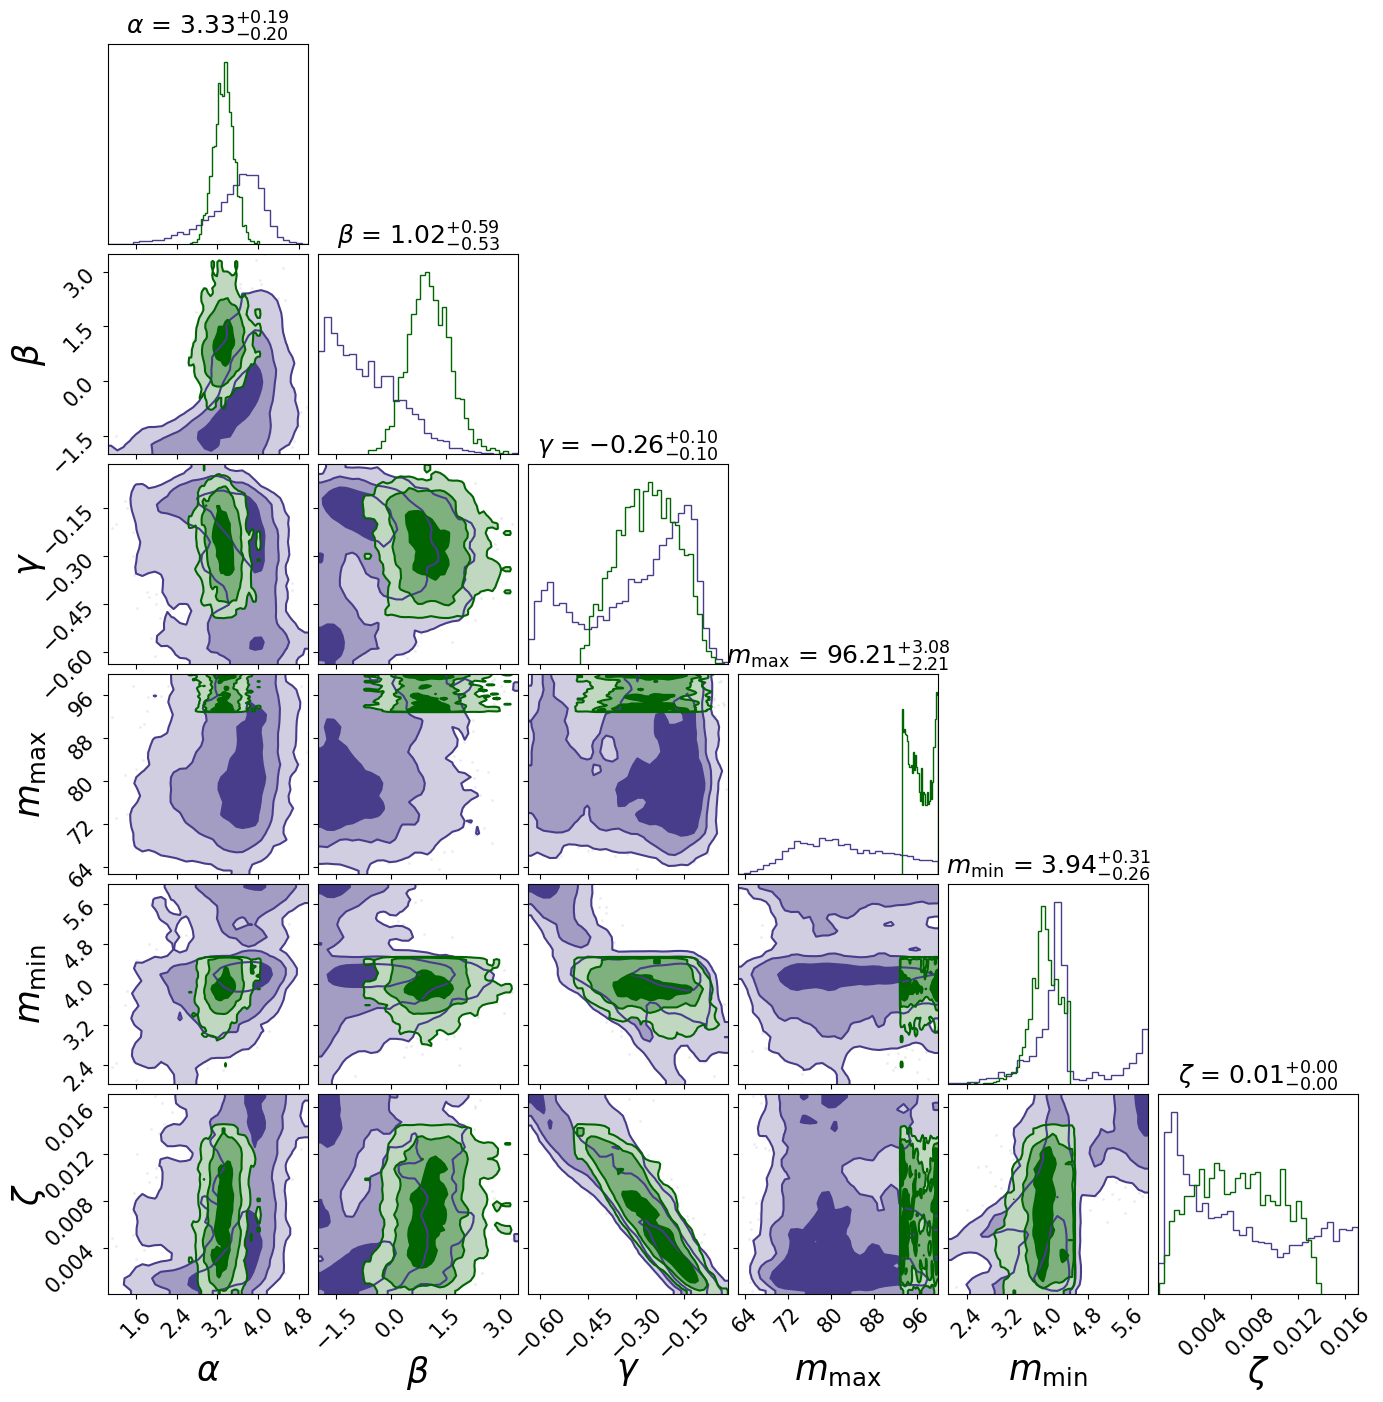

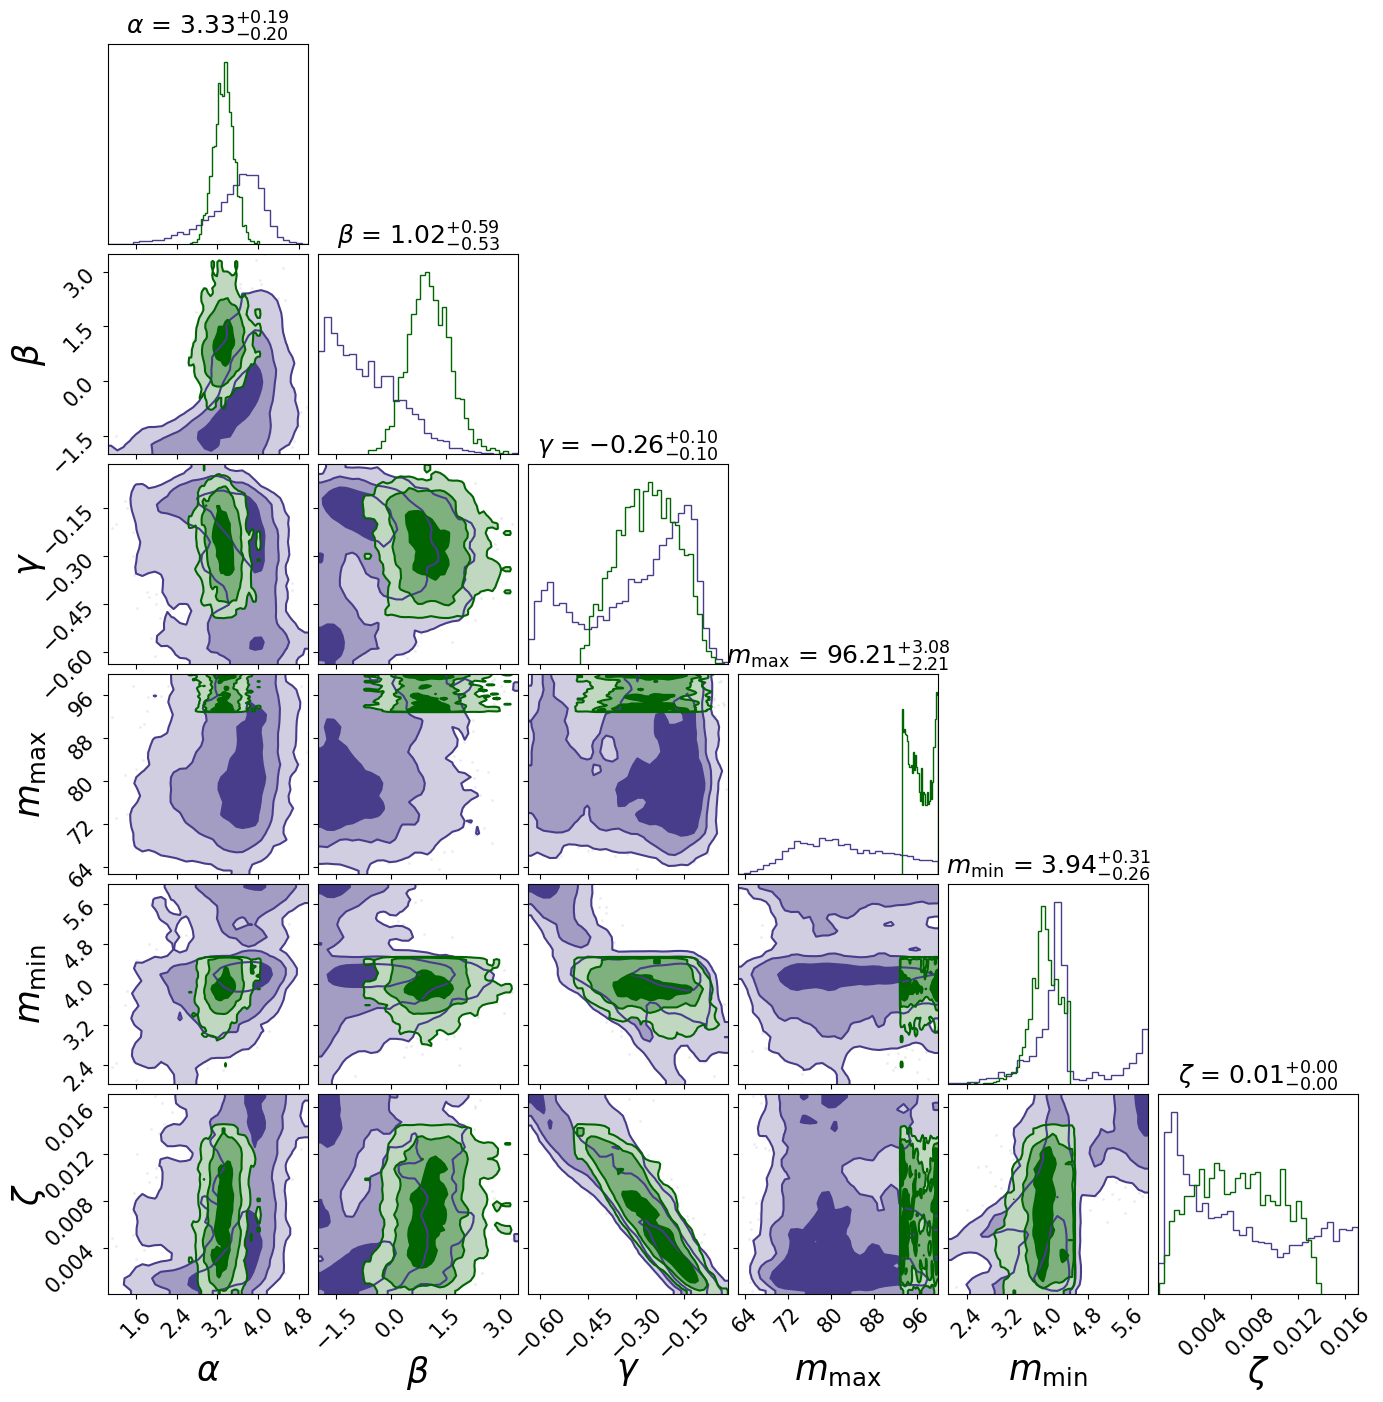

In [90]:
plt.rcParams.update({'font.size': 15})
O4acorner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="darkgreen",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\alpha$',r'$\beta$',r'$\gamma$', r'$m_{\rm max}$', r'$m_{\rm min}$',r'$\zeta$'],
)
fig = corner.corner(parabola_result_dict, **corner_kwargs)
corner.corner(O4aparabola_result_dict, fig=fig, **O4acorner_kwargs)

In [6]:
def PL_m2min_m1(mass1, mmax, mmin, gamma):
    m2min = (mmax-mmin)*(((mass1-mmin)/(mmax-mmin))**gamma)+mmin
    return m2min
    
def parabola_m2min_m1(mass1, mmax, mmin, gamma, zeta):
    m2min = mmin + gamma*(mass1 - mmin) + zeta * (mass1 - mmin)**2
    return m2min


In [1]:
for i in len(parabola_result_dict['posterior']['alpha'])):
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    if np.any(m2min_parabola)<0:
        print(parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])


SyntaxError: unmatched ')' (944750691.py, line 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$m_2^{\\rm min}$')

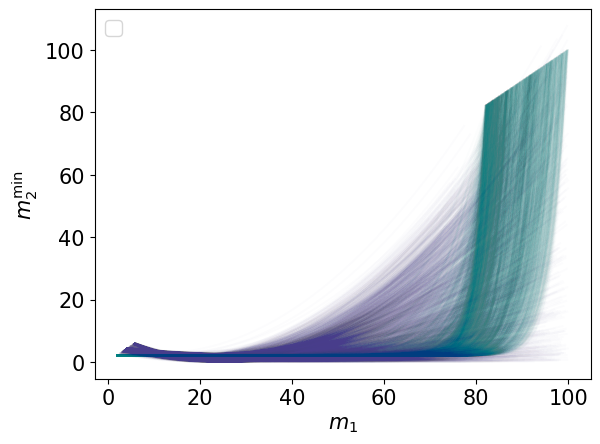

In [79]:
for i in range(2422):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(2., 100.,1000)
#plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='darkslateblue', ls='dashed',\
#         linewidth=2., label='Parabola prior')
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

In [71]:
mass1_parabola = np.linspace(parabola_result_dict['mmin'], parabola_result_dict['mmax'],1000)
mass1_array=np.swapaxes(np.linspace(parabola_result_dict['mmin'], parabola_result_dict['mmax'],1000),0,1)
m2min_parabola = parabola_m2min_m1(mass1_array, np.reshape(parabola_result_dict['mmax'],(-1,1)), np.reshape(parabola_result_dict['mmin'],(-1,1)),\
                     np.reshape(parabola_result_dict['gamma'],(-1,1)), np.reshape(parabola_result_dict['zeta'],(-1,1)))
#mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
#mass1_array = np.tile(mass1_PL,(np.shape(PL_result_dict['mmax'])[0],1))
#m2min_PL = PL_m2min_m1(mass1_PL, np.reshape(PL_result_dict['mmax'],(-1,1)), np.reshape(PL_result_dict['mmin'],(-1,1)),\
#                     np.reshape(PL_result_dict['gamma'],(-1,1)))

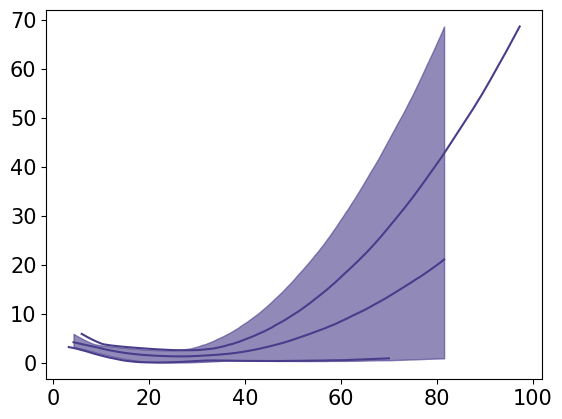

In [78]:
plt.plot(np.percentile(mass1_array, q=5, axis=0),np.percentile(m2min_parabola, q=5, axis=0), color='darkslateblue')
plt.plot(np.percentile(mass1_array, q=95, axis=0),np.percentile(m2min_parabola, q=95, axis=0), color='darkslateblue')
plt.plot(np.median(mass1_array, axis=0),np.median(m2min_parabola, axis=0), color='darkslateblue')
plt.fill_between(np.median(mass1_array, axis=0), np.percentile(m2min_parabola, q=5, axis=0)\
                 ,np.percentile(m2min_parabola, q=95, axis=0), color='darkslateblue', alpha=0.6)

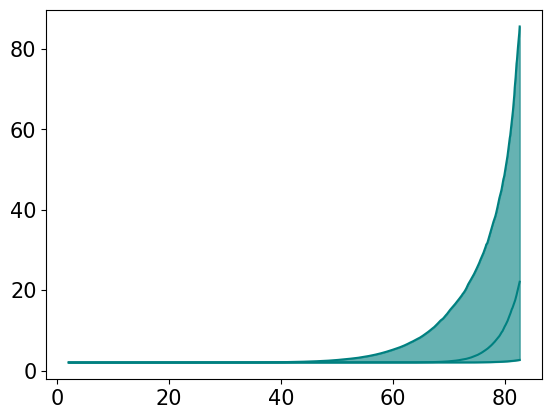

In [50]:
plt.plot(mass1_PL,np.percentile(m2min_PL, q=5, axis=0), color='teal')
plt.plot(mass1_PL,np.percentile(m2min_PL, q=95, axis=0), color='teal')
plt.plot(mass1_PL,np.median(m2min_PL, axis=0), color='teal')
plt.fill_between(mass1_PL, np.percentile(m2min_PL, q=5, axis=0)\
                 ,np.percentile(m2min_PL, q=95, axis=0), color='teal', alpha=0.6)

Text(0, 0.5, '$m_2^{\\rm min}$')

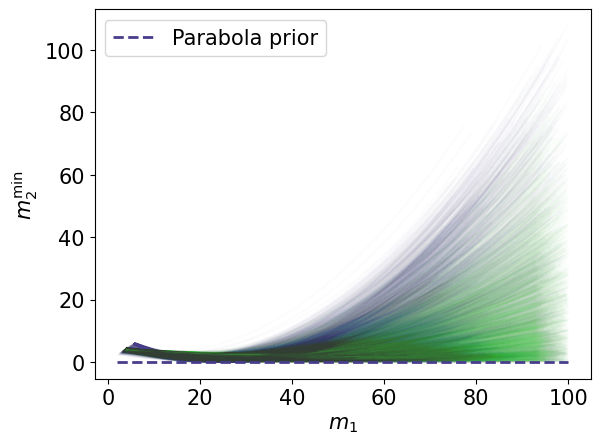

In [10]:
for i in range(2422):#len(result['posterior']['alpha'])):

    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    mass1_parabola_cond = np.linspace(parabolacond_result_dict['mmin'][i], parabolacond_result_dict['mmax'][i],1000)
    m2min_parabola_cond = parabola_m2min_m1(mass1_parabola, parabolacond_result_dict['mmax'][i], parabolacond_result_dict['mmin'][i],\
                     parabolacond_result_dict['gamma'][i], parabolacond_result_dict['zeta'][i])
    plt.plot(mass1_parabola_cond, m2min_parabola_cond, color='limegreen', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='darkslateblue', ls='dashed',\
         linewidth=2., label='Parabola prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$q_{\\rm min}$')

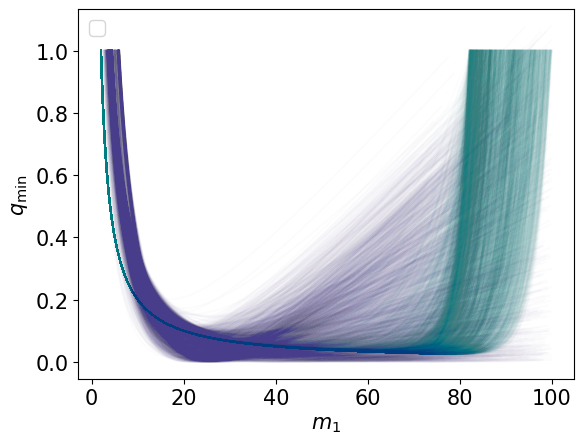

In [81]:
for i in range(2422):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
#plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.)/mass1_prior, color='darkslateblue',\
#         ls='dashed', linewidth=2., label='Parabola prior')
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
plt.legend()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$q_{\rm min}$')

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/corner/core.py:795: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


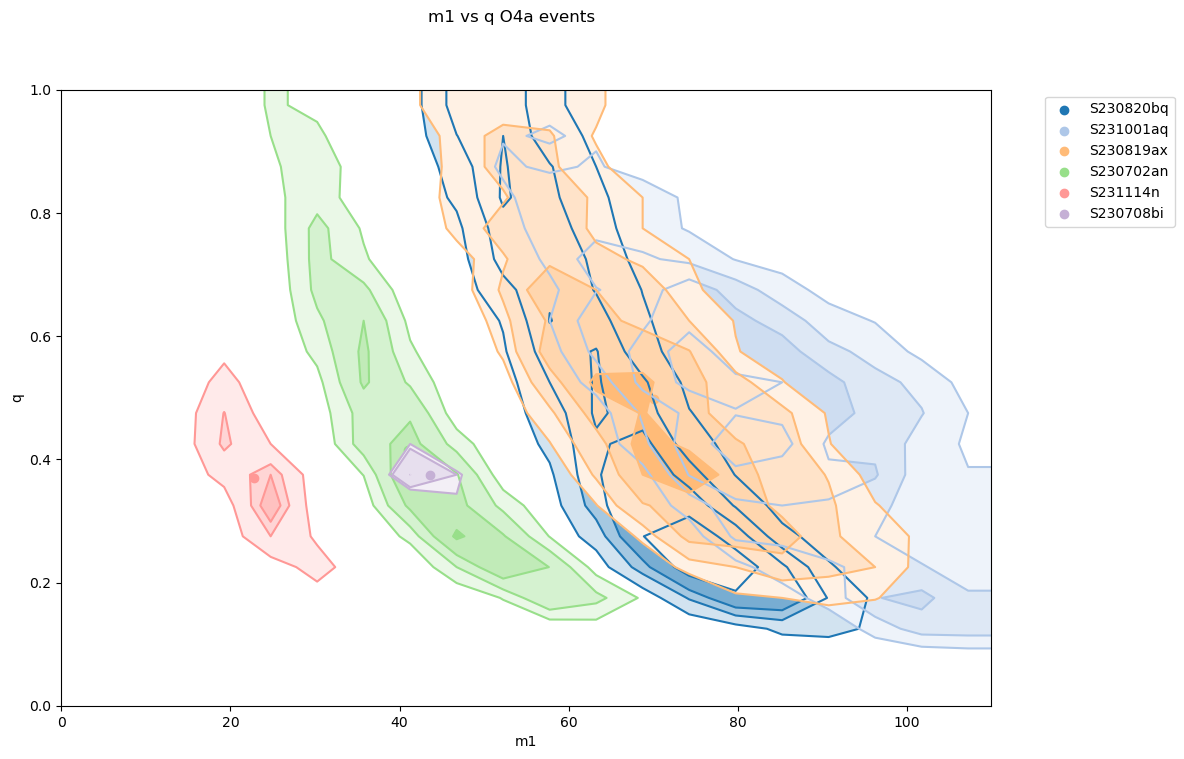

In [77]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)

#plot events
for filename in glob.glob("m1_q_event_samples/S*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    eventname = (os.path.basename(filename)).split('.')[0]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i], contour_kwargs={'label':f'{eventname}'})
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

"""
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')
"""

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q O4a events')
plt.savefig('m1_vs_q_O4a_events_nomodels.pdf', bbox_inches='tight')

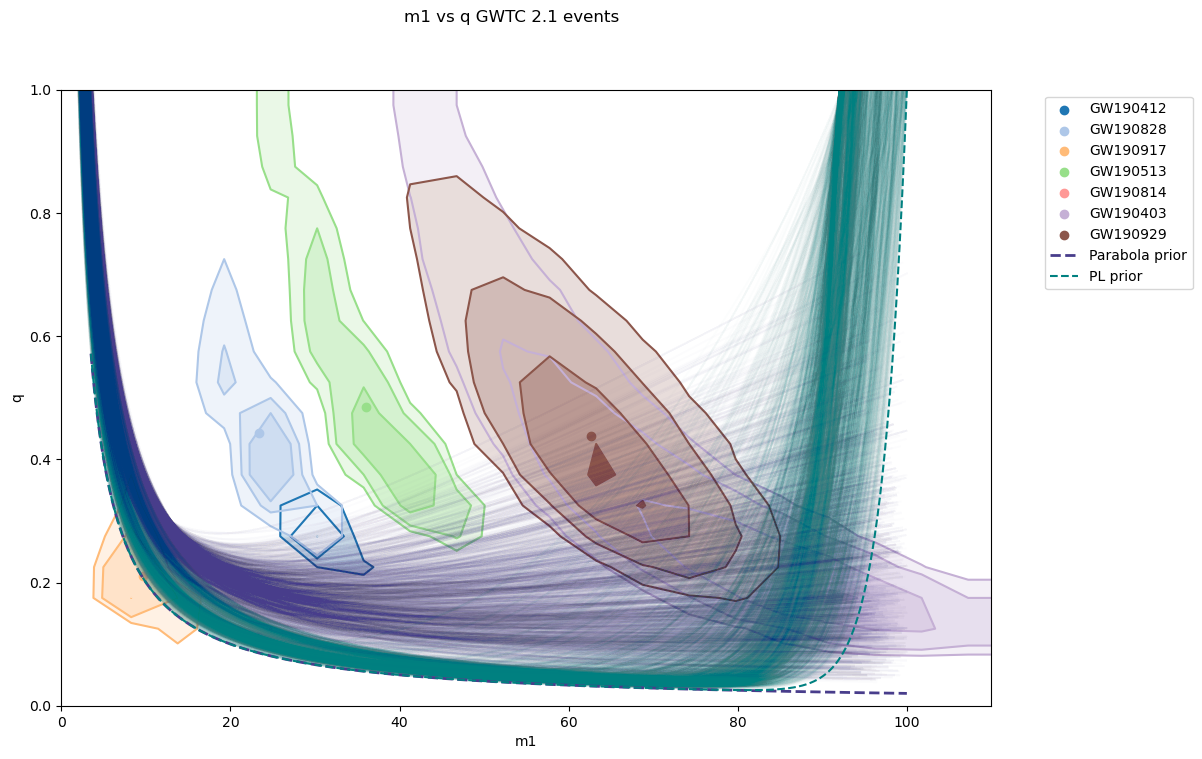

In [79]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1
        
#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')


plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 2.1 events')
plt.savefig('m1_vs_q_GWTC21_events_models.pdf', bbox_inches='tight')

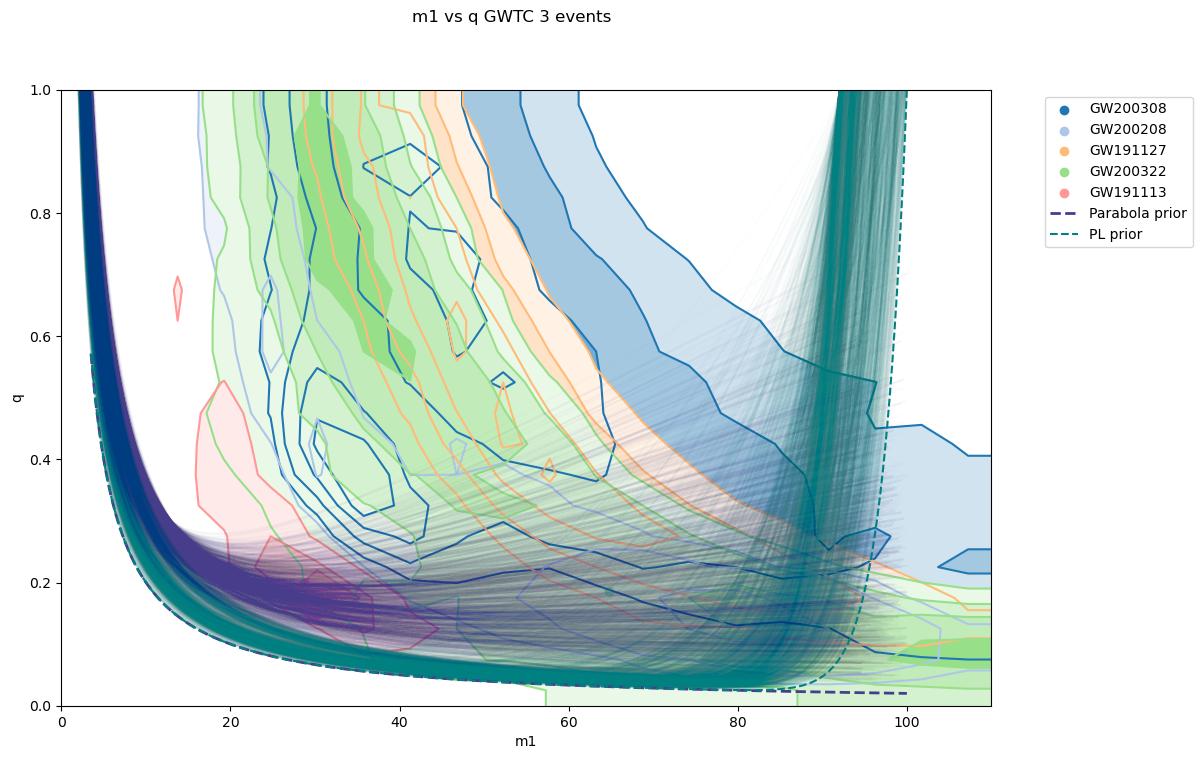

In [80]:
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 12))
i=0
plt.rcParams["figure.figsize"] = (12,8)


for filename in glob.glob("m1_q_event_samples/IGWN-GWTC3*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q), fill_contours=True, plot_density=False,\
                  range=[(0,110), (0,1)], plot_datapoints=False, color=colors[i])
        plt.scatter(np.median(mass1),np.median(q), color=colors[i], label=f'{eventname}')
        i+=1

#plot variable qmin model samps
for i in np.random.choice(14732,3000):#len(result['posterior']['alpha'])):
    mass1_PL = np.linspace(PL_result_dict['mmin'][i], PL_result_dict['mmax'][i],1000)
    m2min_PL = PL_m2min_m1(mass1_PL, PL_result_dict['mmax'][i], PL_result_dict['mmin'][i],\
                     PL_result_dict['gamma'][i])
    
    mass1_parabola = np.linspace(parabola_result_dict['mmin'][i], parabola_result_dict['mmax'][i],1000)
    m2min_parabola = parabola_m2min_m1(mass1_parabola, parabola_result_dict['mmax'][i], parabola_result_dict['mmin'][i],\
                     parabola_result_dict['gamma'][i], parabola_result_dict['zeta'][i])
    plt.plot(mass1_PL, m2min_PL/mass1_PL, color='teal', alpha=0.01)
    plt.plot(mass1_parabola, m2min_parabola/mass1_parabola, color='darkslateblue', alpha=0.01)

mass1_prior = np.linspace(3.5, 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,2.,0.,0.)/mass1_prior, color='darkslateblue',\
         ls='dashed', linewidth=2., label='Parabola prior')
plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.)/mass1_prior, color='teal', ls='dashed', label='PL prior')

plt.xlabel('m1')
plt.ylabel('q')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.suptitle('m1 vs q GWTC 3 events')
plt.savefig('m1_vs_q_GWTC_3_events_models.pdf', bbox_inches='tight')